In [1]:
%load_ext autoreload
%autoreload 2

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import modJoint as mj
pi = np.pi
import seaborn as sns
import pandas as pd

In [64]:
# write function for inverse cdf
def inv_cdf(cdf,probe): return np.argmin(np.abs(np.expand_dims(cdf,1) - probe),0)

# Simulate sequence with:
* Prior Distribution
* Sequence Prob
* both

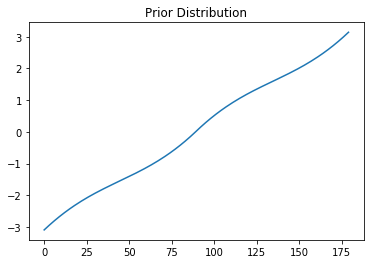

In [65]:
# prior
this_M = mj.modJoint()
d = this_M.D
ori = this_M.ori
theta = this_M.theta

plt.plot(ori,d)
plt.title('Prior Distribution')
plt.show()

In [175]:
S = pd.DataFrame()
s_trans_try = [0,1]
s_prior_try = [0,1]
kap_use = np.arange(2.0,3.1,.2)
for s_trans in s_trans_try:
    for s_prior in s_prior_try:
        for kap in kap_use:
            this_M = mj.modJoint(gammaCB=.6,kappaCB= kap,stim_trans=s_trans,stim_prior=s_prior)
            this_M.run_model(5000)
            S_ = pd.Series({'StimTrans':s_trans,'StimPrior':s_prior,'KappaCB':kap,'E':np.std(this_M.E)})
            S = S.append(S_,ignore_index=1)
S['KappaCB'] = np.round(S['KappaCB'],1)

In [176]:
sns.barplot(data=S,x='KappaCB',y='E',hue ='StimTrans')

In [ ]:
# Compare CB model performance on biased vs. un-biased datasets

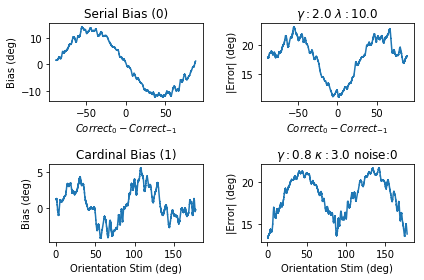

In [215]:
gam_use, kap_use = 0.8,3.0
this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=0,stim_prior=1)
this_M.run_model(50000)
this_M.quick_view_results(lwin=1000)

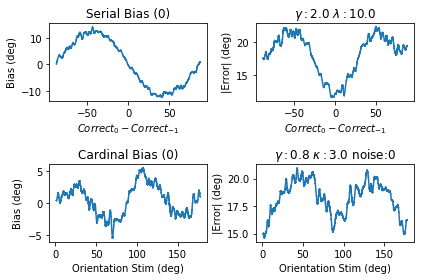

24.277085316725515


In [216]:
this_M2 = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=0,stim_prior=0)
this_M2.run_model(50000)
this_M2.quick_view_results(lwin=1000)
print(np.std(this_M2.E))

17.80729767571855 24.20491397577126
18.19417929976385 24.277085316725515


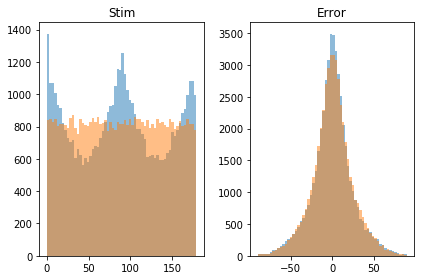

In [222]:
# confirm stim have correct distribution
print(np.mean(np.abs(this_M.E)),np.std(this_M.E))
print(np.mean(np.abs(this_M2.E)),np.std(this_M2.E))

plt.subplot(122)
plt.hist(this_M.E,60,alpha=.5)
plt.hist(this_M2.E,60,alpha=.5)
plt.title('Error')
plt.subplot(121)
plt.hist(this_M.stim,60,alpha=.5)
plt.hist(this_M2.stim,60,alpha=.5)
plt.title('Stim')
plt.tight_layout()
plt.show()

In [234]:
foo = mj.modJoint(uniform_trans=1,uniform_tuning=1)
foo.run_model(50000)

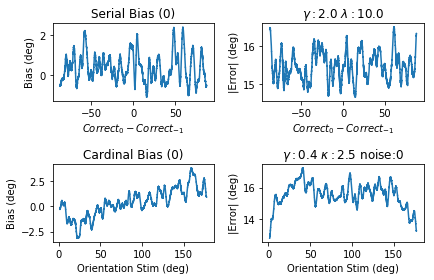

In [235]:
foo.quick_view_results()

In [237]:
# SB model compare
gam_use, kap_use = 0.8,3.0
for s_trans in [0,1]:
    for u_trans in [0,1]:
        this_M = mj.modJoint(gammaCB=gam_use,kappaCB= kap_use,stim_trans=s_trans,uniform_trans=u_trans)
        this_M.run_model(5000)
        S_ = pd.Series({'StimTrans':s_trans,'ModelUTrans':u_trans,'KappaCB':kap,'E':np.std(this_M.E)})
        S = S.append(S_,ignore_index=1)

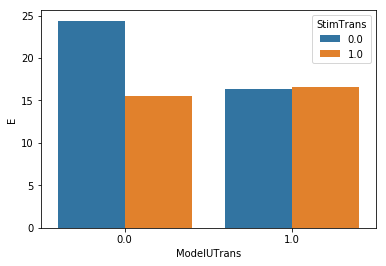

In [239]:
sns.barplot(data=S,x='ModelUTrans',y='E',hue='StimTrans')

In [157]:
kap = 2.5
this_M = mj.modJoint(kappaCB= kap,stim_trans=1,stim_prior=0,noiseCB = 0.0)
this_M.run_model(50000)



30.17422366871433
Throwing away 11829 trials with zero [0] spikes
Med of 1 Spikes


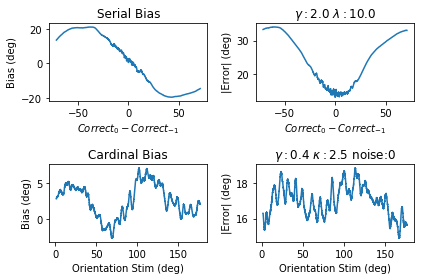

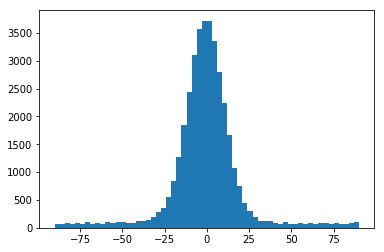

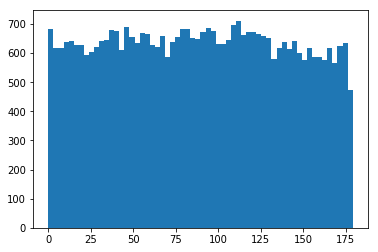

In [158]:
this_M.quick_view_results(lwin = 1000)
plt.hist(this_M.d,60)
plt.show()
plt.hist(this_M.stim,60)
plt.show()

In [152]:
np.std(this_M.E)

8.597527889232063

In [104]:
out = this_M.pos_exp()

In [105]:
out.shape
out = 

(30, 180, 20)

[autoreload of modJoint failed: Traceback (most recent call last):
  File "/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/AD/tsheehan/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/home/AD/tsheehan/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/AD/tsheehan/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/mnt/n

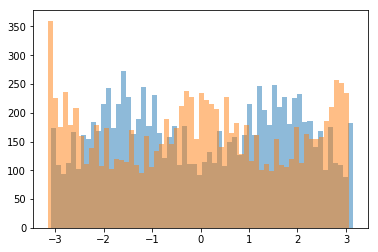

In [62]:
# get stimuli to match! 
N = 10000
bns = 60
seq_seed = np.random.randint(0,180,N)
seq_inv = d[seq_seed]
plt.hist(seq_inv,bns,alpha=.5)
# plt.show()
# oppisite of what I want...
# ind_og = theta[seq_seed]
ing_og = np.random.rand(N)*2*pi-pi

# seq = np.argmin(np.abs(np.expand_dims(d,1) - ind_og),0)
seq = inv_cdf(d,ind_og)
plt.hist(theta[seq],bns,alpha=.5)
plt.show()

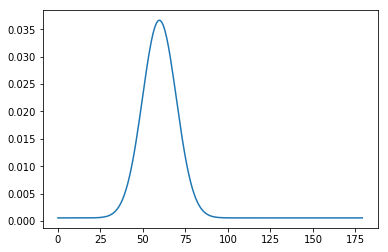

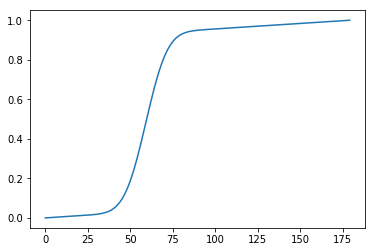

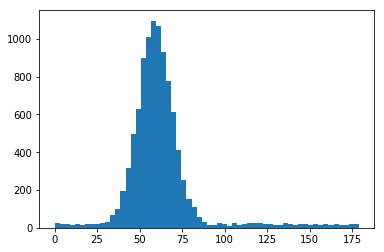

In [51]:
# sequence with transition model
seq_seed = np.random.rand(N) # randint(0,180,N)
s_1 = 60
trans_prob = this_M.cf(s_1)
cdf_trans = np.cumsum(trans_prob)
plt.plot(trans_prob)
plt.show()
plt.plot(cdf_trans)
plt.show()
foo = inv_cdf(cdf_trans,seq_seed)
plt.hist(foo,60)
plt.show()

In [72]:
# gen seq
N_SB=1000

seq_SB = np.zeros(N_SB,dtype=int)
seq_SB[0] = np.random.randint(0,180)
for i in range(N_SB-1):
    trans_prob = this_M.cf(seq_SB[i])
    cdf_trans = np.cumsum(trans_prob)
    seq_SB[i+1] = inv_cdf(cdf_trans,np.random.rand())


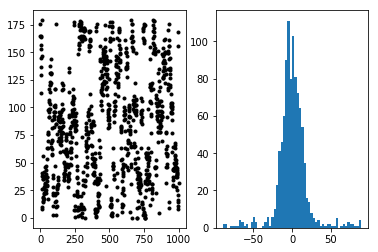

In [26]:
d = this_M.angle(seq_SB[1:],seq_SB[:-1])
plt.subplot(121)
plt.plot(seq_SB,'k.')
plt.subplot(122)
plt.hist(d,60)
plt.show()

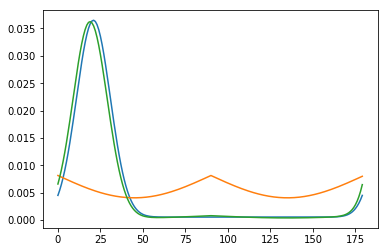

In [27]:
plt.plot(trans_prob)
plt.plot(this_M.p_theta)
j_prob = trans_prob*this_M.p_theta
j_prob /= np.sum(j_prob)
plt.plot(j_prob)
plt.show()


In [42]:
N_J=10000
prior = this_M.p_theta
seq_joint = np.zeros(N_J)
for i in range(N_J-1):
    trans_prob = this_M.cf(seq_joint[i])
    joint_prob = trans_prob*prior
    joint_prob/=np.sum(joint_prob)
    cdf_joint = np.cumsum(joint_prob)
    seq_joint[i+1] = inv_cdf(cdf_joint,np.random.rand())

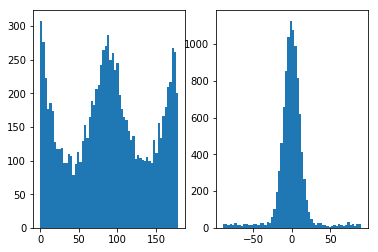

In [45]:
d = np.concatenate(([0],this_M.angle(seq_joint[1:],seq_joint[:-1])))
plt.subplot(121)
plt.hist(seq_joint,60)
plt.subplot(122)
plt.hist(d,60)
plt.show()




















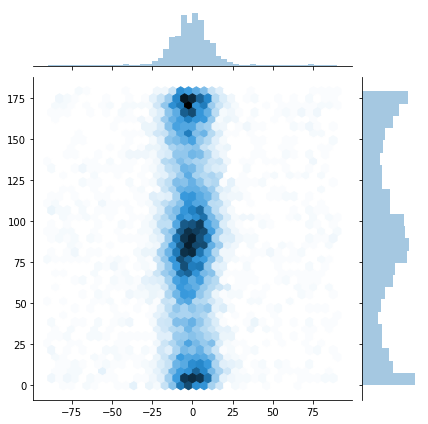

In [46]:
sns.jointplot(d,seq_joint,kind='hex')